# Customer Churn Analysis (EDA)

**Business Context:**
Understanding customer churn is critical for telecom companies — retaining customers is cheaper than acquiring new ones. High churn rates indicate dissatisfaction or misaligned service offerings.

**Goal:**

* Identify key factors associated with churn

* Explore hidden patterns in the data using clustering and PCA

* Generate insights for predictive modeling

## 1. Setup

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

sns.set(style="whitegrid", palette="muted")

# Load dataset
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Data Overview

In [2]:
# Data types and shape
print("Shape:", df.shape)
print(df.dtypes)

# Check missing values
print("\nMissing values:\n", df.isna().sum())

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Shape: (7043, 21)
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessB

**Observation:**

* `TotalCharges` is stored as an object, with some empty strings.

* Target variable `Churn` is categorical.

## 3. Data Cleaning

In [3]:
# Convert TotalCharges to numeric, map empty strings to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.strip(), errors='coerce')

# Impute missing TotalCharges with 0 (tenure = 0 customers)
df['TotalCharges'].fillna(0, inplace=True)

# Create binary target
df['Class'] = (df['Churn'] == 'Yes').astype(int)

/tmp/ipython-input-2133940496.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


## 4. Univariate Analysis

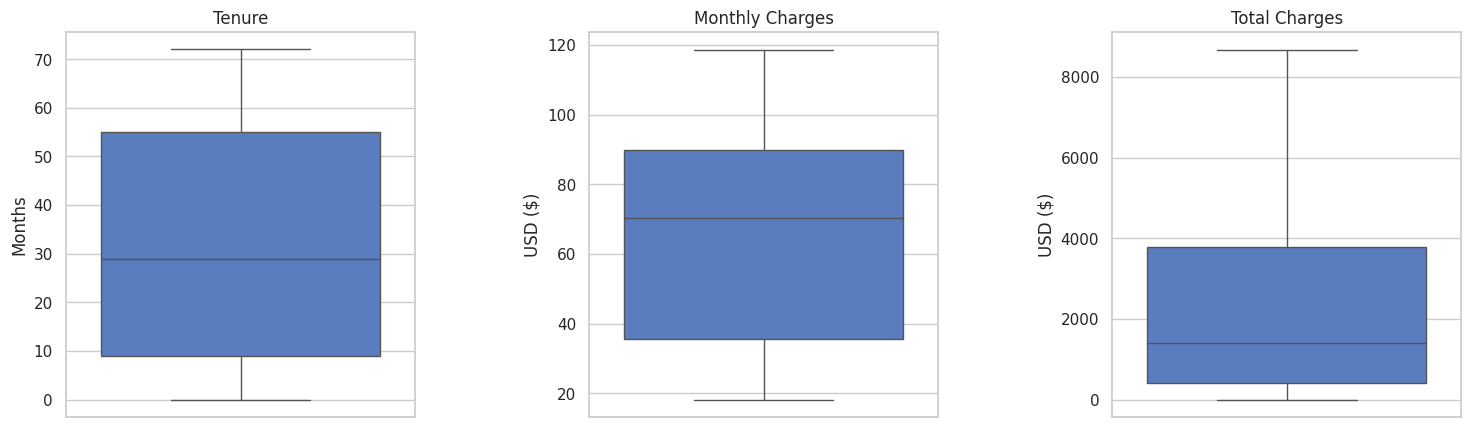

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tenure
sns.boxplot(y='tenure', data=df, ax=axes[0])
axes[0].set_title("Tenure")
axes[0].set_ylabel("Months")

# MonthlyCharges
sns.boxplot(y='MonthlyCharges', data=df, ax=axes[1])
axes[1].set_title("Monthly Charges")
axes[1].set_ylabel("USD ($)")

# TotalCharges
sns.boxplot(y='TotalCharges', data=df, ax=axes[2])
axes[2].set_title("Total Charges")
axes[2].set_ylabel("USD ($)")

plt.subplots_adjust(wspace=0.5)
plt.show()

**Observation:**

* `TotalCharges` is left-skewed, many low-charge customers.

* `MonthlyCharges` is relatively uniform.

* `tenure` is relatively uniform.

## 5. Churn Distribution

/tmp/ipython-input-1359520212.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='pastel')


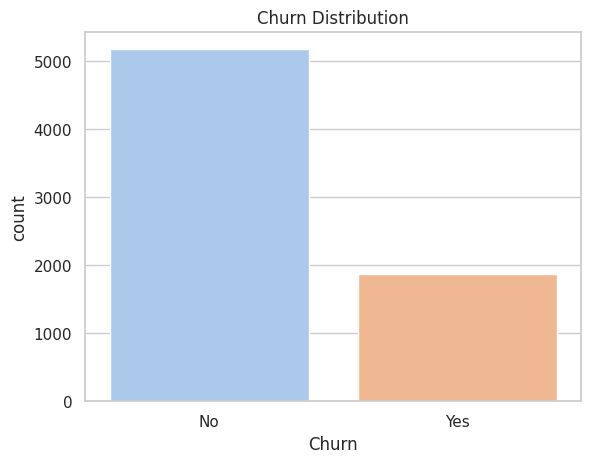

Churn ratio: 0.27


In [5]:
sns.countplot(data=df, x='Churn', palette='pastel')
plt.title("Churn Distribution")
plt.show()

print("Churn ratio: {:.2f}".format(df['Class'].mean()))

**Observation:**

* ~27% of customers churned → imbalance to address in modeling

## 6. Categorical Feature Analysis

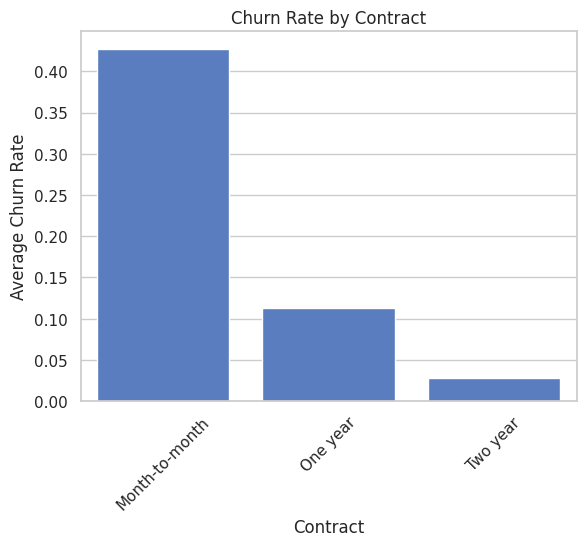

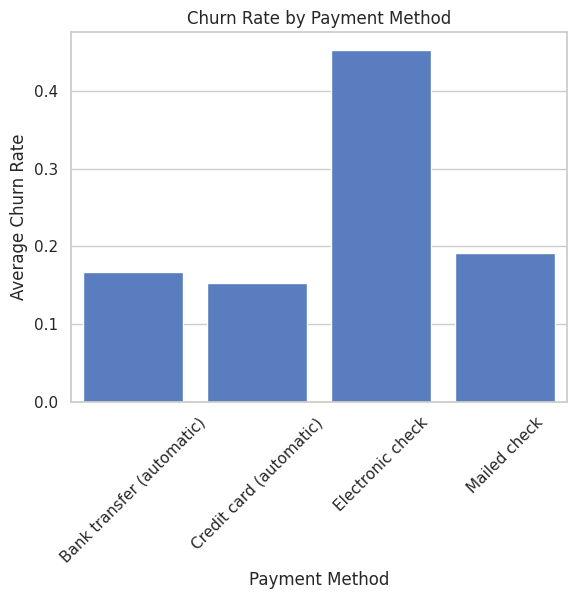

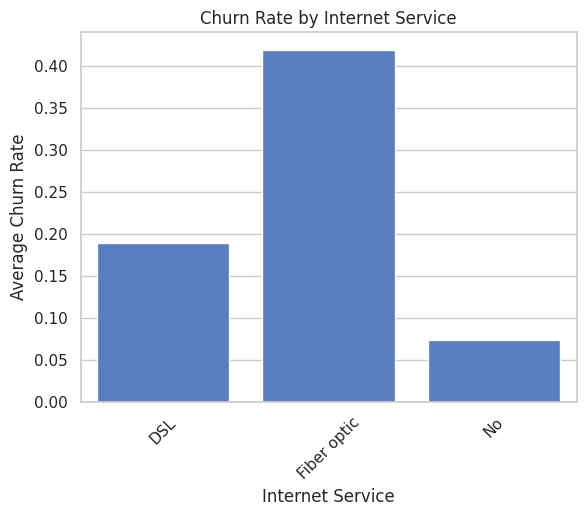

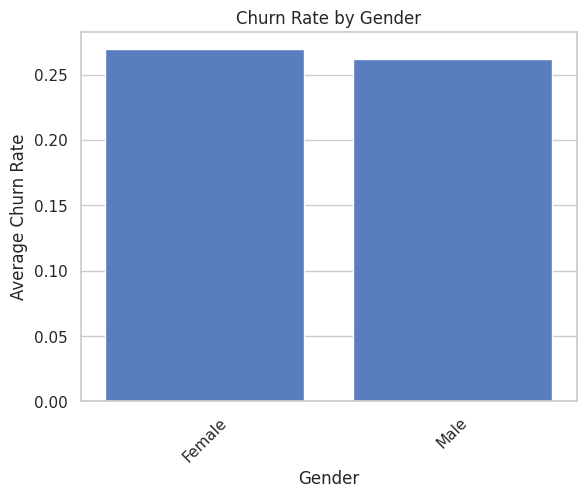

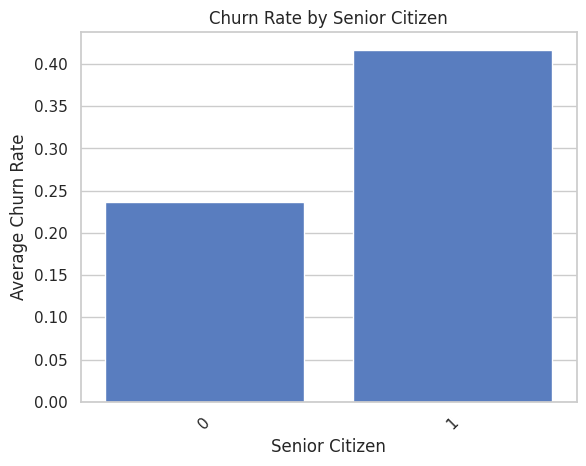

In [6]:
categorical_features = ['Contract', 'PaymentMethod', 'InternetService', 'gender', 'SeniorCitizen']
titles = {'Contract': 'Contract', 'PaymentMethod': 'Payment Method',
          'InternetService': 'Internet Service', 'gender': 'Gender',
          'SeniorCitizen': 'Senior Citizen'}

for col in categorical_features:
    avg_churn = df.groupby(col)['Class'].mean().reset_index()
    sns.barplot(data=avg_churn, x=col, y='Class')
    plt.ylabel('Average Churn Rate')
    plt.xlabel(titles[col])
    plt.title(f'Churn Rate by {titles[col]}')
    plt.xticks(rotation=45)
    plt.show()


**Insights:**

* Month-to-month contracts → higher churn

* Electronic check → higher churn

* Fiber optic internet → higher churn

* Gender → minimal difference

* Senior citizens → moderate variation

## 7. Feature Engineering

/tmp/ipython-input-3964968564.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_churn_bin = df.groupby('TenureBin')['Class'].mean().reset_index()


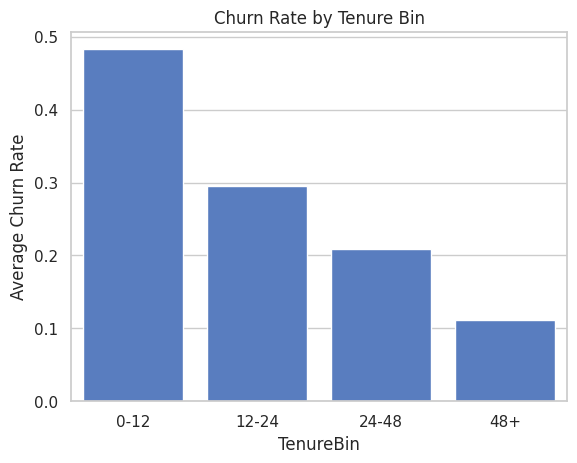

In [7]:
# Tenure bins
bins = [0, 12, 24, 48, 72]
labels = ['0-12', '12-24', '24-48', '48+']
df['TenureBin'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

# Lifetime value proxy
df['EstimatedLifetimeValue'] = df['MonthlyCharges'] * df['tenure']

# Churn by tenure bin
avg_churn_bin = df.groupby('TenureBin')['Class'].mean().reset_index()
sns.barplot(data=avg_churn_bin, x='TenureBin', y='Class')
plt.ylabel("Average Churn Rate")
plt.title("Churn Rate by Tenure Bin")
plt.show()

**Insights:**

* New customers (0–12 months) → highest churn

* Lifetime value proxy could help predictive modeling

## 8. Correlation Analysis

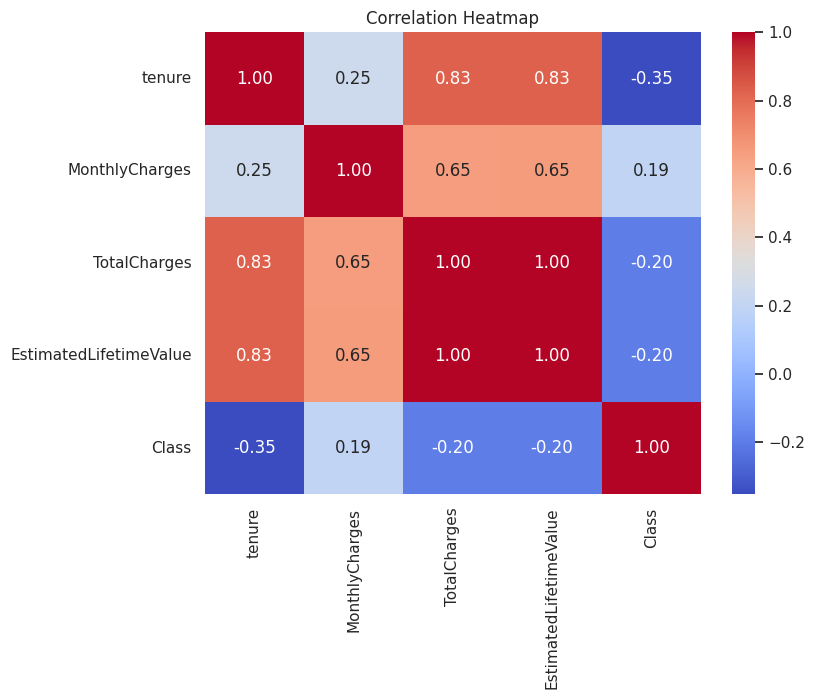

In [8]:
# Numeric correlation heatmap
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'EstimatedLifetimeValue', 'Class']
corr = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Observation:**

* TotalCharges strongly correlated with tenure & EstimatedLifetimeValu

* MonthlyCharges is moderately correlated with TotalCharges

* Positive correlation with Class highlights predictive potential

## 9. Multivariate Plots

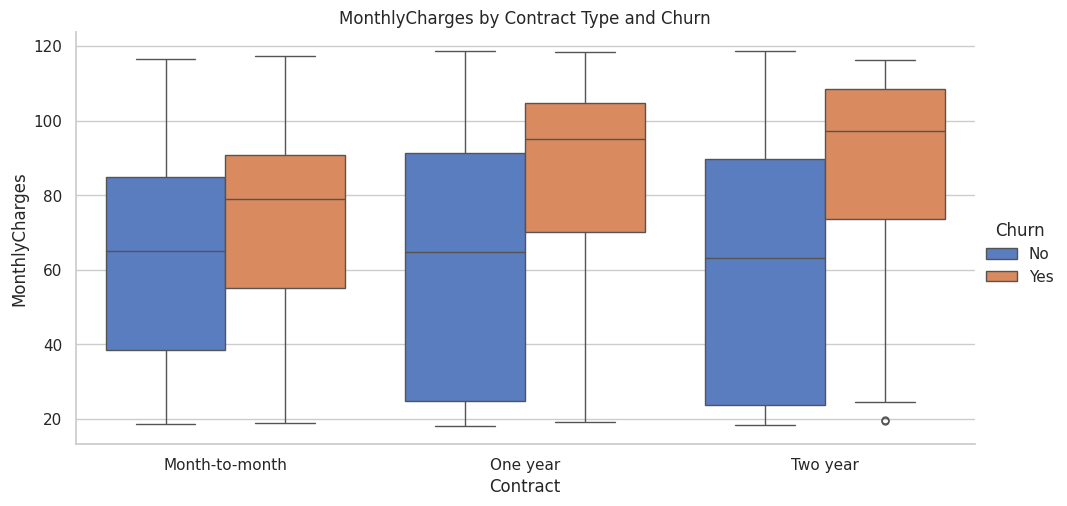

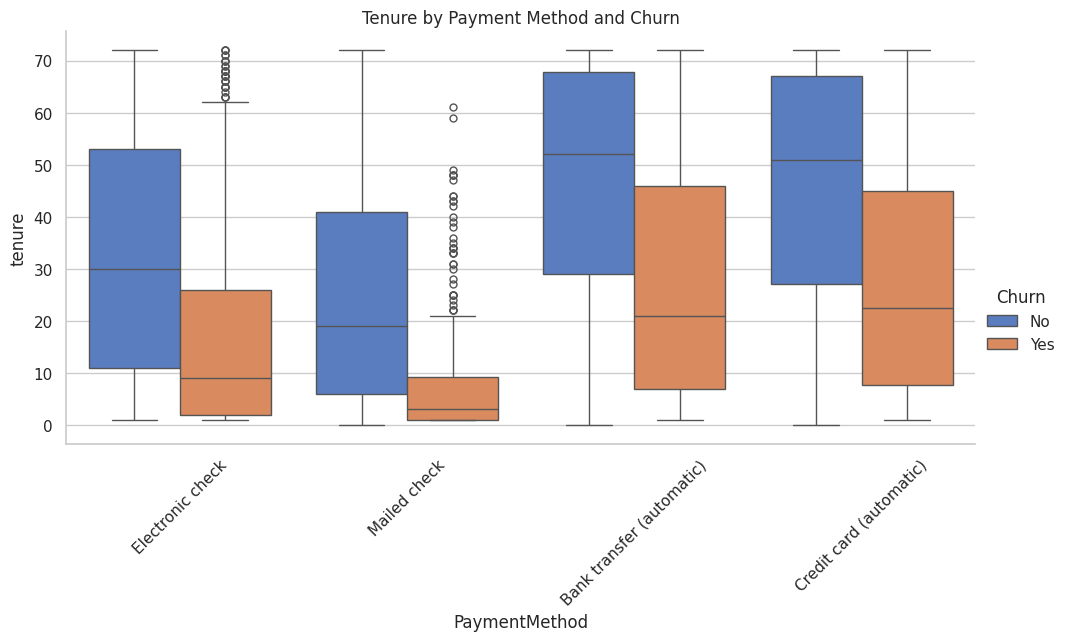

In [9]:
# Contract vs MonthlyCharges vs Churn
sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", data=df, kind="box", height=5, aspect=2)
plt.title("MonthlyCharges by Contract Type and Churn")
plt.show()

# PaymentMethod vs tenure vs Churn
sns.catplot(x="PaymentMethod", y="tenure", hue="Churn", data=df, kind="box", height=5, aspect=2)
plt.xticks(rotation=45)
plt.title("Tenure by Payment Method and Churn")
plt.show()

**Insights:**

* Month-to-month + higher monthly charges → higher churn

* Electronic check + short tenure → higher churn

## 10. Clustering & PCA

In [10]:
# Numeric features (exclude target)
X = df.select_dtypes(include=['int64','float64']).drop(columns=['Class'])
X_scaled = StandardScaler().fit_transform(X)

# PCA 2D
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)
print("Explained variance (2 components):", pca2.explained_variance_ratio_.sum())

# PCA 3D
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)
print("Explained variance (3 components):", pca3.explained_variance_ratio_.sum())

Explained variance (2 components): 0.8483242195467824
Explained variance (3 components): 0.9836682926324202


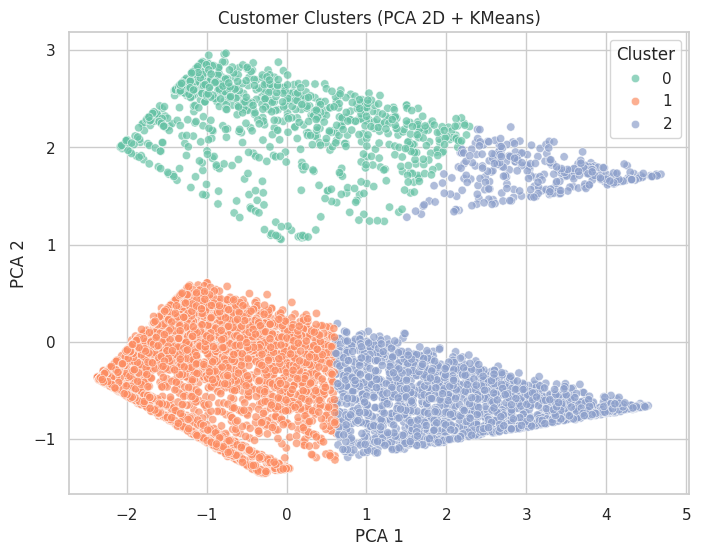

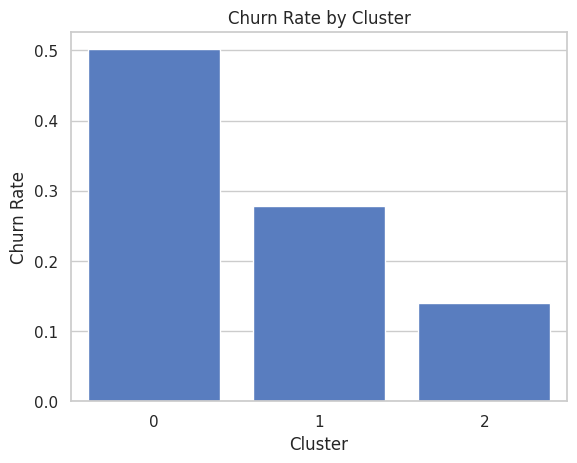

In [11]:
# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca2)
df['Cluster'] = clusters

# 2D cluster plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=df['Cluster'], palette='Set2', alpha=0.7)
plt.title("Customer Clusters (PCA 2D + KMeans)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Churn rate per cluster
cluster_churn = df.groupby('Cluster')['Class'].mean().reset_index()
sns.barplot(data=cluster_churn, x='Cluster', y='Class')
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Cluster")
plt.show()

**Insights:**

* Clustering identifies groups with different churn risk

* Cluster 0 → highest churn → potential target for retention strategies

## 11. Conclusion & Next Steps

**Key Findings:**

* Month-to-month contracts & electronic check payments → high churn

* Short tenure → high churn

* PCA + clustering reveal high-risk customer segments

* Engineered features (TenureBin, EstimatedLifetimeValue, Cluster) useful for modeling

**Next Steps:**

* Feature encoding & scaling

* Train models: Logistic Regression, Random Forest, Gradient Boosting

* Evaluate with stratified CV and AUC

## 12. Export Cleaned Dataset

In [12]:
# Remove Churn as we already have Class for modelling
df.drop(columns=["Churn"], inplace=True)
df.to_csv('dataset_part_1_cleaned.csv', index=False)